In [1]:
import sys 
sys.path.append('../')

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from scipy.fftpack import fftn, ifftn, fftfreq
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%load_ext autoreload
%autoreload 2
from database import Magneticum

In [4]:
dataframe_clu = Magneticum('022','b','cluster').dataframe


In [5]:
dataframe_gal = Magneticum('022','b','galaxies').dataframe

In [7]:
df1 = pd.DataFrame.from_dict(
                            {'x':dataframe_clu['x[kpc/h]']/0.7,
                            'y':dataframe_clu['y[kpc/h]']/0.7,
                            'z':dataframe_clu['z[kpc/h]']/0.7,
                            'vx':dataframe_clu['vx[km/s]'],
                            'vy':dataframe_clu['vy[km/s]'],
                            'vz':dataframe_clu['vz[km/s]'],
                            }   
                            )

In [8]:
df2 = pd.DataFrame.from_dict(
                            {'x':dataframe_gal['x[kpc/h]']/0.7,
                            'y':dataframe_gal['y[kpc/h]']/0.7,
                            'z':dataframe_gal['z[kpc/h]']/0.7,
                            }
                            )

In [134]:
def insert_cube_ids(n,df1,df2=None):

    min_x, max_x = df1['x'].min(), df1['x'].max()
    min_y, max_y = df1['y'].min(), df1['y'].max()
    min_z, max_z = df1['z'].min(), df1['z'].max()   
    
    num_cubes_x = num_cubes_y = num_cubes_z = n

    cube_sizex = int(np.ceil((max_x - min_x) / num_cubes_x))
    cube_sizey = int(np.ceil((max_y - min_y) / num_cubes_y))
    cube_sizez = int(np.ceil((max_z - min_z) / num_cubes_z))

    #assert cube_sizex == cube_sizey == cube_sizez, (cube_sizex, cube_sizey, cube_sizez)
    print(f"Cube size: {(cube_sizex*u.kpc).to(u.Mpc)}")


    def assign_cube_ids(df):
        cube_x = np.floor((df['x'] - min_x) / cube_sizex).astype(int)
        cube_y = np.floor((df['y'] - min_y) / cube_sizey).astype(int)
        cube_z = np.floor((df['z'] - min_z) / cube_sizez).astype(int)
        df['cube_id'] = (cube_x * num_cubes_y * num_cubes_z +
                        cube_y * num_cubes_z +
                        cube_z)
        return df
    if df2 is not None:
        df2 = df2[(min_x < df2['x']) & (df2['x']< max_x)]
        df2 = df2[(min_y < df2['y']) & (df2['y']< max_y)]
        df2 = df2[(min_z < df2['z']) & (df2['z']< max_z)]
        return assign_cube_ids(df2)
    else:
        return assign_cube_ids(df1)

In [158]:
dff1 = insert_cube_ids(91,df1)

Cube size: 10.047 Mpc


In [159]:
dff2 = insert_cube_ids(91,df1,df2)

Cube size: 10.047 Mpc


In [164]:
len(dff1.groupby('cube_id').size())

36320

In [165]:
len(dff2.groupby('cube_id').size())

670039

In [166]:
dff1[dff1['cube_id']==18]

,x,y,z,vx,vy,vz,cube_id
24091,7661.077,3611.538714,189034.914286,-250.165,-356.233,87.6198,18


In [167]:
dff2[dff2['cube_id']==18]

,x,y,z,cube_id
559677,7661.077000,3611.538714,189034.914286,18
559678,7693.832286,3557.487143,189024.285714,18
559679,7606.628714,3673.520143,189016.828571,18
559680,7554.297571,3691.686714,189076.971429,18
559681,7680.904714,3638.647857,188842.428571,18
559682,7575.853857,3636.997714,188635.085714,18
559683,7937.513286,2928.326571,188384.928571,18
559684,7723.461857,3580.341857,189027.028571,18
559685,7527.214000,3646.899714,189125.000000,18
559686,7722.066857,3359.199286,188991.428571,18


In [169]:
dff2.groupby('cube_id').size()

cube_id
0          7
1         15
2         33
3          8
5          5
          ..
753564     6
753565    10
753566     2
753569     2
753570     2
Length: 670039, dtype: int64

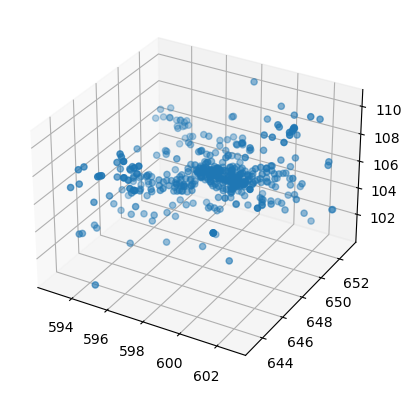

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter((np.array(dd['x'])*u.kpc).to(u.Mpc), (np.array(dd['y'])*u.kpc).to(u.Mpc), (np.array(dd['z'])*u.kpc).to(u.Mpc))

10003.471428571502

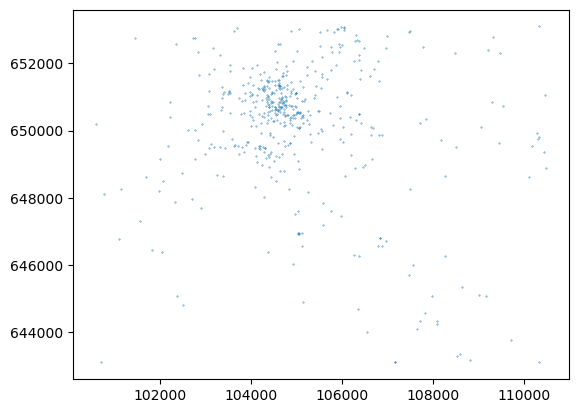

In [28]:
91**3

753571

In [21]:
# assuming df1 and df2 are your dataframes and their columns are ['x', 'y', 'z']

# let's say n is provided by the user
n = 91  # replace this with the actual input

# getting the range of the cube from dataframe1
x_min, x_max = df1['x'].min(), df1['x'].max()
y_min, y_max = df1['y'].min(), df1['y'].max()
z_min, z_max = df1['z'].min(), df1['z'].max()

# defining the edges for each dimension
edges = [np.linspace(x_min, x_max, num=n+1),
         np.linspace(y_min, y_max, num=n+1),
         np.linspace(z_min, z_max, num=n+1)]

# Create a 3D array to hold the unique cube IDs. We create it as a 1D array first, then reshape it.
cube_ids = np.arange(n**3).reshape(n, n, n)


In [25]:
np.diff(edges)

array([[10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97167078,
        10046.97167078, 10046.97167078, 10046.97167078, 10046.97

In [23]:

# Function to get cube ID for a given x, y, z position
def get_cube_id(pos):
    x_index = np.digitize(pos[0], edges[0]) - 1
    y_index = np.digitize(pos[1], edges[1]) - 1
    z_index = np.digitize(pos[2], edges[2]) - 1
    return cube_ids[x_index, y_index, z_index]

# Add cube_id to each galaxy in dataframe2
df2['cube_id'] = df2.apply(get_cube_id, axis=1)

IndexError: index 91 is out of bounds for axis 1 with size 91

In [16]:
df1

,x,y,z,vx,vy,vz,cube_x,cube_y,cube_z,cube_id,velocity
0,331668.485714,632168.971429,645139.057143,88.2910,-206.33800,290.3190,33,62,64,278979,NaN
1,255348.571429,616694.328571,618932.728571,-192.5920,-227.84900,-404.3990,25,61,61,212637,NaN
2,78788.437143,650603.300000,908410.714286,37.6421,-165.25100,54.8057,7,64,90,63881,NaN
3,780125.985714,453116.557143,461240.671429,223.4660,198.29900,-311.9810,77,45,45,641777,NaN
4,653411.428571,314633.085714,399264.285714,-234.9400,152.48200,-224.1430,65,31,39,541125,NaN
...,...,...,...,...,...,...,...,...,...,...,...
42023,432932.857143,702466.157143,272588.400000,284.8770,-264.46500,101.3530,43,69,27,362389,NaN
42024,852456.514286,721343.128571,742103.571429,-594.0110,-1.85447,-107.5430,84,71,73,702138,NaN
42025,610825.271429,669634.242857,114618.024286,-156.6090,-482.48100,4.9137,60,66,11,502877,NaN
42026,381813.028571,306233.614286,668153.342857,151.6930,296.48600,47.2007,38,30,66,317474,NaN


In [34]:
counts

88693.0     481
361266.0    417
510717.0    384
426933.0    373
325845.0    369
           ... 
6212.0        1
428930.0      1
176109.0      1
155633.0      1
718784.0      1
Name: cube, Length: 670048, dtype: int64